# Máltækni - Náttúruvernd

# Data import & manipulation

In [1]:
from numpy.random import default_rng
import re
import tqdm
import pandas as pd
import pickle
import numpy as np

In [2]:
#@Vésteinn
def read_news_tsv(file_name):
    data = []
    with open(file_name, encoding="utf-8") as fh:
        for line in tqdm.tqdm(fh.readlines()):
            title, author, url, timestamp, _, _, text, text_tokenized = line.split("\t")
            article = {
                "title": title,
                "author": author,
                "timestamp": timestamp,
                "text": text,
                "text_tokenized": text_tokenized
            }
            data.append(article)
        return data

In [3]:
articles = read_news_tsv("icelandic_news_sample_22480.tsv")
print(f"Article count {len(articles)}")

100%|██████████| 22248/22248 [00:00<00:00, 269872.45it/s]

Article count 22248


In [4]:
articles_df = pd.DataFrame(articles)

In [5]:
articles_df.head()

title  \
0         ARON CAN ER SILKISLAKUR OG SVALUR - Albumm   
1            Sveindís kemur mjög vel inn í okkar hóp   
2  Keyrði á kyrrstæðan bíl í miðbænum: „Gríðarleg...   
3  Markaðssetja þurfi vannýtt svæði á landsbyggðinni   
4     Biður um þolinmæði í skertri velferðarþjónustu   

                        author                  timestamp  \
0           Ritstjórn visir.is  2017-03-13 12:30:11.58353   
1            Sindri Sverrisson        2020-09-16 13:00:00   
2                 Ritstjórn DV        2019-06-17 08:15:05   
3  Margrét Helga Erlingsdóttir        2019-09-20 12:59:00   
4        Þórdís Arnljótsdóttir        2020-03-28 19:47:25   

                                                text  \
0  ARON CAN ER SILKISLAKUR OG SVALUR—Albumm ☰ FRÉ...   
1  Jón Þór Hauksson, landsliðsþjálfari í fótbolta...   
2  Karlmaður var fluttur á slysadeild í nótt efti...   
3  Stjórnvöld verða að móta sér stefnu til framtí...   
4  Stór hluti þeirra sem fær velferðarþjónustu í ...   

                                      text_tokenized  
0  ARON CAN ER SILKISLAKUR OG SVALUR — Albumm ☰ F...  
1  Jón Þór Hauksson , landsliðsþjálfari í fótbolt...  
2  Karlmaður var fluttur á slysadeild í nótt efti...  
3  Stjórnvöld verða að móta sér stefnu til framtí...  
4  Stór hluti þeirra sem fær velferðarþjónustu í ...

In [6]:
articles_Big = read_news_tsv("articles_until_01-11-2020_detok.tsv")
print(f"Article count {len(articles_Big)}")

100%|██████████| 640136/640136 [00:04<00:00, 129075.37it/s]


Article count 640136


In [7]:
news_Big = pd.DataFrame(articles_Big)

In [9]:
from sklearn.model_selection import train_test_split
data_train, data_test = train_test_split(news_Big, test_size = 0.15, random_state=11)

In [10]:
print(f'Training data examles: {data_train.shape[0]}')
print(f'Test data examles: {data_test.shape[0]}')

Training data examles: 544115
Test data examles: 96021


In [11]:
data_test, data_test_labeled = train_test_split(data_test, test_size = 0.005, random_state=11)

In [12]:
print(f'Test data examles: {data_test.shape[0]}')
print(f'Labeled test data examles: {data_test_labeled.shape[0]}')

Test data examles: 95540
Labeled test data examles: 481


In [13]:
# Subset af training til að koma virkni í gang án þjálfunartíma
_, data_playground = train_test_split(data_train, test_size = 0.10, random_state=11)
print(f'Playground data examles: {data_playground.shape[0]}')

Playground data examles: 54412


# Skriftupælingar

In [14]:
# Skoðar 'count' margar handahófskenndar fréttir og skilar lista af
# algildum indexum fyrir þær fréttir sem innihalda 'náttúruvernd', 'loftslag' eða 'umhverfi'
def rand_frett(safn, count):
    listi = []
    from numpy.random import default_rng
    import re
    rng = default_rng()
    n = safn.shape[0]
    for i in tqdm.trange(count):
        x = rng.integers(n)
        if pd.isnull(safn.iloc[x]["text"]):
            continue
        frett = safn.iloc[x]["text"] # ath iloc
        frettnr = safn.iloc[x].name
        lykilord = ["náttúruvernd", "loftslag", "umhverfi"]
        fjoldi = 0
        for wrd in lykilord:
            fjoldi += len(re.findall(wrd, frett))
        if fjoldi > 0:
            listi.append(frettnr) # Ath. algildur index
            #print(frett)
    return listi

    

In [15]:
# Skoðar allar fréttir í gefnu safni og skilar lista með algildum indexum 
# á þeim fréttum sem innihalda fleiri en 'threshold' fjölda af 'náttúruvernd', 'loftslag' eða 'umhverfi'
def allar_frettir(safn, threshold=0):
    listi = []

    n = safn.shape[0]
    for i in tqdm.trange(n):
        frett = safn.iloc[i]["text"]
        lykilord = ["náttúruvernd", "loftslag", "umhverfi"]
        fjoldi = 0
        for wrd in lykilord:
            fjoldi += len(re.findall(wrd, frett))
        if fjoldi > threshold:
            listi.append(i) # ath. afstæð númer m.v. safn
            #print(frett)
    return listi

    

In [16]:
# Athuga hvaða hlutfall kemur út úr síunni
sample_count = 100000
big_list = rand_frett(news_Big, sample_count)
print(len(big_list)/sample_count)

100%|██████████| 100000/100000 [00:06<00:00, 16036.49it/s]

0.06688


In [17]:
sigtaðar_frettir = allar_frettir(data_test_labeled)

100%|██████████| 481/481 [00:00<00:00, 13243.40it/s]


In [18]:
for fr in sigtaðar_frettir[:3]:
    print(data_test_labeled.iloc[fr])

title             Fyrst var hún hötuð en í dag er hún daglegt brauð
author                                       Ritstjórn Hringbrautar
timestamp                                       2019-04-28 21:09:00
text              (Á mynd: Áður en p-pillan og aðrar getnaðarvar...
text_tokenized    ( Á mynd : Áður en p-pillan og aðrar getnaðarv...
Name: 605530, dtype: object
title                                 „Sá glæsilegasti frá upphafi“
author                                             Ritstjórn mbl.is
timestamp                                       2020-09-05 09:36:00
text              „Veturinn fram undan verður sá þéttasti og glæ...
text_tokenized    „ Veturinn fram undan verður sá þéttasti og gl...
Name: 396081, dtype: object
title                 Tekur við kyndlinum sem tenging við umheiminn
author                                        Bergsteinn Sigurðsson
timestamp                                       2017-04-19 20:15:41
text              Hús sem gert er í nafni Vigdísar Finnbogad

In [19]:
len(sigtaðar_frettir)

38

In [22]:
# Niðurstöður
jakvætt = {165133,322727,343386,233961,500609,327615}
# flokka sem neikvæð bara þau sem eru handyfirfarin
neikvætt = set(data_test_labeled.index).difference(jakvætt)

print(len(neikvætt))
print(len(jakvætt))
print(data_test_labeled.shape[0])

475
6
481


In [111]:
data_test_labeled["label"] = np.zeros((len(data_test_labeled), 1), dtype = np.int8)

In [122]:
for i in jakvætt:
    data_test_labeled.loc[i,"label"] = 1

In [ ]:
for fr in big_list[:10]:
    print(news_Big.loc[fr])

In [69]:
# 'vistaðar niðurstöður' úr flokkun að neðan.
# ja =    {285192, 531728, 543888, 290583, 624031, 620326, 586792, 300335, 615601, 57271, 541114, 232512, 203202, 565829, 402387, 212309, 563685, 207852, 319984, 338039, 551033}
# vafi =  {188673, 253189, 582670, 549263, 580500, 196829, 138785, 201385, 146412, 624949, 467836, 18621}
# annad = {425218, 398339, 232836, 377475, 40966, 108040, 61449, 411913, 441611, 188049, 594451, 357913, 389534, 447519, 403616, 598944, 403230, 438562, 383270, 300455, 260392, 545578, 245419, 496045, 280365, 111155, 77492, 616884, 26553, 598717, 397246, 264765, 180800, 353226, 292173, 217422, 53844, 179030, 306134, 524889, 622682, 288093, 557662, 146272, 471780, 628965, 111590, 180717, 506996, 129525, 423028, 19063, 409848, 290171}
possibly_corrupt = {628965, 409848, 549263}
print(ja, vafi, annad, sep="\n")
print(len(ja))

{285192, 531728, 543888, 290583, 624031, 620326, 586792, 300335, 615601, 57271, 541114, 232512, 203202, 565829, 402387, 212309, 563685, 207852, 319984, 338039, 551033}
{188673, 253189, 582670, 549263, 580500, 196829, 138785, 201385, 146412, 624949, 467836, 18621}
{425218, 398339, 232836, 377475, 40966, 108040, 61449, 411913, 441611, 188049, 594451, 357913, 389534, 447519, 403616, 598944, 403230, 438562, 383270, 300455, 260392, 545578, 245419, 496045, 280365, 111155, 77492, 616884, 26553, 598717, 397246, 264765, 180800, 353226, 292173, 217422, 53844, 179030, 306134, 524889, 622682, 288093, 557662, 146272, 471780, 628965, 111590, 180717, 506996, 129525, 423028, 19063, 409848, 290171}
21


In [34]:
data_train.loc[slembsigti[29]]
slembsigti[29]

549263

In [ ]:
#ja = []
#vafi = []
#annad = []
for i in sigtaðar_frettir[:3]:
    frett = data_test_labeled.iloc[i]
    print(frett["text"])
    print(frett["title"])
    einkunn = input("Um náttúruvernd?\n")
    if einkunn == str(1):
        ja.append(frett.name)
    elif einkunn == str(2):
        vafi.append(frett.name)
    else:
        annad.append(frett.name)

In [38]:
# ja = set()
# vafi = set()
# annad = set()
# neinei = set()
def label(safn, sigti, count=-1):
    for nr, i in enumerate(sigti[:count]):
        if i in ja or i in vafi or i in annad:
            continue
        frett = safn.loc[i] # Gert er ráð fyrir global index
        print(f"Frétt nr. {nr}")
        print(frett["text"])
        print(frett["title"])
        einkunn = input("Um náttúruvernd?\n")
        print()
        if einkunn == str(1):
            ja.add(frett.name)
        elif einkunn == str(2):
            vafi.add(frett.name)
        elif einkunn == str(0):
            neinei.add(frett.name)
        else:
            annad.add(frett.name)

In [ ]:
label(data_train, data_train.index)

Sigta af handahófi úr train <br>
Flokka sigtað í já og nei<br>
flokka af handahófi úr ósigtuðu (svo nei sé ekki bara sigtað nei)<br>
    - kannski í sér hóp til að sjá hvort það endurspeglist í flokkunum?<br>
Þegar það eru komnir nokkrir tugir í já, þá athuga hvar flokkaða lendir í LDA<br>
Kannski finna gögn sem eru sérstaklega um náttúruvernd, fréttir frá samtökum, Sólin, ...<br>

In [24]:
slembsigti = rand_frett(data_train, 2000)

100%|██████████| 2000/2000 [00:00<00:00, 11842.93it/s]


In [36]:
label(data_train, slembsigti)

Frétt nr. 35
Ef maður skoðar grunnskólann er mjög mikilvægt að hann sjái til þess að börn öðlist grunnleggjandi færni í lestri, skrift, náttúrufræði og stærðfræði. Grunnleggjandi færni er lykilatriði fyrir börn að ná tökum á til þess að geta öðlast þekkingu. Þekking er algjört lykilatriði fyrir framfarir í öllum þjóðfélögum. Eins og skýringamyndin sýnir eru þessir þættir inni í rauðunni. Hérna er mikilvægt að maður noti þær aðferðir sem rannsóknir sýna að séu þær bestu fyrir nám. Í rannsóknum kemur ein aðferð best út við lestrarkennslu. Það er hljóðaaðferð (eindaraðferð)—bókstaf-hljóð-aðferð. Bókstaf-hljóð-kunnátta er hornsteinn fyrir lestur samkvæmt fremstu vísindamönnum í heiminum á sviði lestrar (Nation, Dehaene, Lyytinen og Tønnesen). Frábærir kennarar sem hafa unnið lengi við kennslu lesturs styðja einnig notkun hljóðaaðferðar og mikilvægi bókstaf-hljóða-kunnáttu fyrir læsi. Sem sagt að kenna börnum bókstafina og þeirra hljóð, vinna með að lesa tveggja og þriggja stafa orð og síða

KeyboardInterrupt: Interrupted by user

In [135]:
playground_sigti = allar_frettir(data_playground, 5)

100%|█████████████████████████████████████████████████████████████████████████| 54412/54412 [00:01<00:00, 30996.20it/s]


In [136]:
len(playground_sigti)

229

In [ ]:
ja_p, kannski_p, nei_p = label(data_playground, playground_sigti, 20)

# GENSIM LDA pælingar

In [42]:
import gensim

In [161]:
import string
stop_words = set()
extra_stop_words = ["var", "er", "ekki", "sé"]
with open("is_stop_words.txt") as stop_word_file:
    for line in stop_word_file.readlines():
        stop_words.add(line.strip())
stop_words.update(set(string.punctuation))
stop_words.update(set(extra_stop_words))

In [44]:
import tokenizer
from islenska import Bin

b = Bin()

def naive_bin_lemma(token):
    candidates = b.lookup_lemmas_and_cats(token)
    if not candidates:
        return None
    if len(candidates) > 1:
        return None
    cand = candidates.pop()
    if cand[1] not in ["kk", "kvk", "hk"]:
        return None
    return cand[0]


def tokenize_and_lemmatize(sentence):
    if pd.isnull(sentence): # Líklegast óþarft núna
            return []
    tokenized_text = list(tokenizer.split_into_sentences(sentence))
    lemmas = []
    for sent in tokenized_text:
        for token in sent.split():
            if token in stop_words:
                continue
            lemma = naive_bin_lemma(token.lower())
            if lemma is not None:
                lemmas.append(lemma)
    return lemmas

In [45]:
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

In [46]:
load = True
if load:
    with open('data_words.pickle', 'rb') as fh:
        data_words = pickle.load(fh)

In [47]:
# Nú þegar keyrt
if not load:
    data_words = [tokenize_and_lemmatize(a) for a in tqdm.notebook.tqdm(data_train["text_tokenized"])]

In [48]:
if not load:
    with open('data_words.pickle', 'wb') as fh:
        pickle.dump(data_words, fh)

In [49]:
if not load:
    # Build the bigram and trigram models
    bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
    trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

    # Faster way to get a sentence clubbed as a trigram/bigram
    bigram_mod = gensim.models.phrases.Phraser(bigram)
    trigram_mod = gensim.models.phrases.Phraser(trigram)

    # See trigram example
    print(trigram_mod[bigram_mod[data_words[0]]])


In [50]:
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

In [148]:
data_words_bigrams = make_bigrams(tqdm.tqdm(data_words))

100%|███████████████████████████████████████████████████████████████████████| 544115/544115 [00:15<00:00, 35345.09it/s]


In [51]:
if not load:
    # Create Dictionary
    id2word = corpora.Dictionary(data_words)

    # Create Corpus
    texts = data_words

    # Term Document Frequency
    corpus = [id2word.doc2bow(text) for text in texts]

In [52]:
if not load:
    with open('data_words_bigrams.pickle', 'wb') as fh:
        pickle.dump(data_words_bigrams, fh)
    with open('id2word.pickle', 'wb') as fh:
        pickle.dump(id2word, fh)
    with open('corpus.pickle', 'wb') as fh:
        pickle.dump(corpus, fh)

In [53]:
if load:
    with open('data_words_bigrams.pickle', 'rb') as fh:
        data_words_bigrams = pickle.load(fh)
    with open('id2word.pickle', 'rb') as fh:
        id2word = pickle.load(fh)
    with open('corpus.pickle', 'rb') as fh:
        corpus = pickle.load(fh)

In [54]:
if not load:
    lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                               id2word=id2word,
                                               num_topics=10, 
                                               random_state=100,
                                               update_every=1,
                                               chunksize=100,
                                               passes=10,
                                               alpha='auto',
                                               per_word_topics=True)
    # Ath eta, tengja náttúruverndarorð við ákveðinn hóp
    lda_model.save("./Big_lda_model")

In [58]:
if load:
    lda_model = gensim.models.ldamulticore.LdaModel.load("Big_lda_model")

## Tilraunir

In [59]:
from pprint import pprint
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.041*"maður" + 0.034*"kona" + 0.034*"fólk" + 0.029*"barn" + 0.021*"mynd" + '
  '0.017*"dagur" + 0.015*"fjölskylda" + 0.013*"saga" + 0.012*"rannsókn" + '
  '0.010*"viðtal"'),
 (1,
  '0.061*"lögregla" + 0.027*"dagur" + 0.023*"maður" + 0.023*"morgunn" + '
  '0.022*"klukka" + 0.018*"bíll" + 0.016*"höfuðborgarsvæði" + 0.015*"nótt" + '
  '0.014*"landslið" + 0.014*"land"'),
 (2,
  '0.032*"dagur" + 0.026*"leikmaður" + 0.023*"ísland" + 0.022*"kvöld" + '
  '0.021*"mínúta" + 0.016*"sigur" + 0.014*"mark" + 0.013*"deild" + '
  '0.013*"umferð" + 0.013*"tímabil"'),
 (3,
  '0.033*"dagur" + 0.021*"land" + 0.019*"fólk" + 0.018*"svæði" + 0.013*"íbúi" '
  '+ 0.013*"staður" + 0.010*"yfirvald" + 0.010*"ferðamaður" + 0.010*"fjöldi" + '
  '0.009*"sögn"'),
 (4,
  '0.034*"forseti" + 0.027*"bandaríki" + 0.027*"flokkur" + 0.025*"þingmaður" + '
  '0.020*"dagur" + 0.020*"forsætisráðherra" + 0.018*"ríkisstjórn" + '
  '0.017*"kosning" + 0.015*"þjóð" + 0.015*"íbúð"'),
 (5,
  '0.049*"mál" + 0.038*"frumvarp" + 

In [60]:
[id2word[i[0]] for i in lda_model.get_topic_terms(6, topn=50)]

['ísland',
 'fólk',
 'verkefni',
 'ákvörðun',
 'breyting',
 'upplýsing',
 'samfélag',
 'einstaklingur',
 'stjórn',
 'starf',
 'vinna',
 'niðurstaða',
 'háskóli',
 'sveitarfélag',
 'áhersla',
 'markmið',
 'stofnun',
 'skýrsla',
 'umræða',
 'dagur',
 'áhrif',
 'hugmynd',
 'þjónusta',
 'samstarf',
 'ís-lending',
 'raun',
 'rannsókn',
 'mál',
 'framtíð',
 'aðgerð',
 'aðili',
 'þjóð',
 'samband',
 'tækifæri',
 'nemandi',
 'regla',
 'áhyggja',
 'starfsmaður',
 'árangur',
 'gagn',
 'ábyrgð',
 'stuðningur',
 'tilkynning',
 'notkun',
 'nefnd',
 'þáttur',
 'skoðun',
 'tillaga',
 'hlutfall',
 'ráðherra']

In [61]:
id2word.token2id["náttúruvernd"]

4050

In [62]:
# Af hverju sýnir þetta fyrir fæst orð?
lda_model.get_term_topics(id2word.token2id["króna"])

[(8, 0.01231972)]

In [63]:
doc_lda[2][1]

[(16, [3, 0, 6]),
 (42, [6, 2, 1, 8]),
 (55, [3, 1, 2]),
 (64, [6, 8]),
 (65, []),
 (66, [0]),
 (67, [3]),
 (68, [6]),
 (69, [3]),
 (70, [3]),
 (71, []),
 (72, [3]),
 (73, [3, 1]),
 (74, [3]),
 (75, []),
 (76, [3]),
 (77, []),
 (78, [3]),
 (79, [3]),
 (80, [3]),
 (81, [3]),
 (82, [3]),
 (83, [3, 1, 2, 6]),
 (84, [3]),
 (85, [3]),
 (86, [3]),
 (87, [3]),
 (88, [3, 0]),
 (89, [3]),
 (90, [3, 6]),
 (91, []),
 (92, [3]),
 (93, [1, 2]),
 (94, [2, 1]),
 (95, [1, 2]),
 (96, []),
 (97, [3]),
 (98, []),
 (99, []),
 (100, [3]),
 (101, []),
 (102, [1]),
 (103, []),
 (104, [3]),
 (105, [3, 1, 6, 0]),
 (106, [0]),
 (107, [3, 1]),
 (108, [3]),
 (109, []),
 (110, [3, 0]),
 (111, []),
 (112, [3, 0]),
 (113, []),
 (114, [3]),
 (115, [3, 0, 1, 6]),
 (116, [3, 0, 6]),
 (117, [3, 0]),
 (118, [0]),
 (119, [2]),
 (120, [3]),
 (121, [3])]

In [45]:
#lda = gensim.models.ldamodel.LdaModel.load("small_lda_model")
#lda = gensim.models.ldamulticore.LdaModel.load("small_lda_model")

In [186]:
data_test_labeled[data_test_labeled["label"] == 1]["text"]

233961    Reykjavíkurborg og Festa, miðstöðu um samfélag...
327615    Greint er frá því á vef Ísafjarðabæjar í dag a...
500609    Ísland er miðpunktur þeirra breytinga sem eru ...
343386    Í morgun vaknaði ég við að sólin skein inn um ...
322727    Umhverfis-og auðlindaráðherra, Guðmundur Ingi ...
165133    Halldór Björnsson, sérfræðingur í loftslagsbre...
Name: text, dtype: object

In [64]:
sport = """„Úrslitin eru það mikilvægasta sem við tökum með okkur úr leik kvöldsins. Það er afrek að vinna Porto á útivelli. Að sigra eins og við sigruðum gerir sigurinn enn sætari,“ sagði Jürgen Klopp að loknum 5-1 sigri Liverpool á Drekavöllum í kvöld.
„Það var mikið af góðum augnablikum í leik kvöldsins. Við gátum séð að Porto horfði á leikinn okkar gegn Brentford þar sem þeir voru mjög beinskeyttir, ég vildi lagfæra það á vellinum og við gerðum það skref fyrir skref.“
"""
sport = tokenize_and_lemmatize(sport)

In [65]:
covid= """Í gær greindust 36 einstaklingar innan­lands með Co­vid-19 og voru 28 í sóttkví við greiningu. Tuttugu voru óbólusettir. 348 einstaklingar eru í einangrun hér á landi vegna sjúkdómsins og 1.164 í sóttkví. """
covid=tokenize_and_lemmatize(covid)

In [90]:
def classify(text, verbose=False):
    bow_vector = id2word.doc2bow(text)
    #print(lda_model[bow_vector])
    for index, score in sorted(lda_model[bow_vector][0], key=lambda tup: -1*tup[1]):
        if verbose:
            print("Cluster: {}\t Score: {}\t Topic: {}".format(index, score, lda_model.print_topic(index, 5)))
    if verbose:
        print()
    return(lda_model[bow_vector][0])

In [133]:
def lda_group(indexes, verbose=False):
    mat = np.zeros((len(indexes), 10), dtype=np.float32)
    for i, example in enumerate(tqdm.tqdm(indexes)):
        text = data_train.loc[example]["text_tokenized"] # getur verið news_Big fyrir öll dæmin
        lemm_text = tokenize_and_lemmatize(text)
        vec = classify(lemm_text)
        for group, score in vec:
            mat[i, group] = score
    score_sum = np.sum(mat, axis=0)
    if verbose:
        print(score_sum)
        prin3t(score_sum/sum(score_sum))
        print(-np.sort(-score_sum))
        print(np.argsort(-score_sum))
    return mat

In [144]:
jalist = list(ja)

In [145]:
ja_mat = lda_group(jalist, False)

100%|██████████| 21/21 [00:00<00:00, 25.38it/s]


In [146]:
np.argmax(ja_mat, axis=1)

array([0, 6, 6, 8, 6, 6, 8, 6, 6, 3, 6, 6, 6, 3, 6, 6, 3, 3, 6, 8, 8])

In [147]:
jalist[0]

285192

In [149]:
lda_group([285192])

100%|██████████| 1/1 [00:00<00:00, 28.78it/s]


array([[0.24969508, 0.1226537 , 0.03776057, 0.2387303 , 0.0113837 ,
        0.        , 0.19715801, 0.01023057, 0.11941863, 0.        ]],
      dtype=float32)

In [150]:
data_train.loc[285192]

title                             Nýtt skógarmeindýr annað hvert ár
author                                       Kristín Sigurðardóttir
timestamp                                       2019-09-18 16:34:14
text              Mikið landnám skógarmeindýra á undanförnum þre...
text_tokenized    Mikið landnám skógarmeindýra á undanförnum þre...
Name: 285192, dtype: object

In [153]:
atta = [3,6,19,20]
þristur = [8,12,15,16]
sexa = [1,2,4,5,7,8,9,10,11,13,14,17]

In [156]:
for i in atta:
    print(data_train.loc[jalist[i]])

title             Gera ekki athugasemdir við umhverfisvænt fiskeldi
author                                             Ritstjórn mbl.is
timestamp                                       2017-04-06 17:30:00
text              „Við erum ekki á móti fiskeldi, heldur viljum ...
text_tokenized    „ Við erum ekki á móti fiskeldi , heldur vilju...
Name: 290583, dtype: object
title                              „Orð eru ódýr en aðgerðir kosta“
author                                             Ritstjórn mbl.is
timestamp                                       2019-06-11 11:57:00
text              „Ég hef lýst því yfir að ekki verði hreyft við...
text_tokenized    „ Ég hef lýst því yfir að ekki verði hreyft vi...
Name: 586792, dtype: object
title                      Hrygning bleikju hafin í vötnum landsins
author                                             Bjarni Rúnarsson
timestamp                                       2020-10-14 22:04:09
text              Hrygningartímabil ferskvatnsbleikju stendu

In [157]:
for i in þristur:
    print(data_train.loc[jalist[i]])

title                Lausna leitað varðandi fráveitumál við Mývatn 
author                                          Innanríkisráðuneyti
timestamp                                       2017-12-22 12:00:22
text              Ríkisstjórnin fól í dag fjármála-og efnahagsrá...
text_tokenized    Ríkisstjórnin fól í dag fjármála- og efnahagsr...
Name: 615601, dtype: object
title             Kerfisbreytingar eiga að snúast um loftslagsbr...
author                                   Rósa Björk Brynjólfsdóttir
timestamp                                       2016-10-17 17:30:02
text              Eitt af vinsælustu orðunum fyrir þessar kosnin...
text_tokenized    Eitt af vinsælustu orðunum fyrir þessar kosnin...
Name: 203202, dtype: object
title             Katrín ætlar að ræða við Guðna um að Svandís v...
author                                            Birgir Olgeirsson
timestamp                                  2018-02-23 17:30:12.6946
text              Katrín Jakobsdóttir forsætisráðherra ætlar

In [158]:
for i in sexa:
    print(data_train.loc[jalist[i]])

title             Trump getur ekki afnumið loftslagsaðgerðir með...
author                                          Kjartan Kjartansson
timestamp                                2017-10-19 14:00:15.334057
text              Ríkisstjórn Donalds Trump í Bandaríkjunum getu...
text_tokenized    Ríkisstjórn Donalds Trump í Bandaríkjunum getu...
Name: 531728, dtype: object
title             Guðlaugur Þór stýrði utanríkisráðherrafundi NB...
author                                           Utanríkisráðuneyti
timestamp                                       2019-04-01 12:48:00
text              Öryggis-og varnarmál, þróun mála í Evrópu og m...
text_tokenized    Öryggis- og varnarmál , þróun mála í Evrópu og...
Name: 543888, dtype: object
title                                  Umhverfisþing hafið í Hörpu 
author                                             Ritstjórn mbl.is
timestamp                                       2017-10-20 09:14:00
text              Umhverfisþing hófst í Hörpu í morgun með á

In [159]:
neineilist = list(neinei)
nei_mat = lda_group(neineilist)
np.argmax(nei_mat, axis=1)

100%|██████████| 30/30 [00:00<00:00, 51.59it/s]


array([6, 4, 3, 3, 3, 1, 8, 7, 0, 8, 4, 7, 3, 1, 0, 2, 0, 2, 4, 1, 3, 3,
       9, 8, 9, 6, 8, 3, 8, 8])

In [160]:
data_train.loc[neineilist[0]]

title                      BAADER og SKAGINN 3X sameina krafta sína
author                                     Ritstjórn Bæjarins besta
timestamp                                       2020-10-29 11:35:42
text              BAADER og SKAGINN 3X hafa sent frá sér fréttat...
text_tokenized    BAADER og SKAGINN 3X hafa sent frá sér fréttat...
Name: 94336, dtype: object

In [127]:
import matplotlib.pyplot as plt
def visual_groups(vigur):
    plt.bar(list(range(10)), vigur)
    plt.show()
    
    plt.bar(range(len(vigur)), -np.sort(-vigur))
    plt.xticks(range(len(vigur)), np.argsort(-vigur))
    plt.show()

100%|██████████| 30/30 [00:00<00:00, 52.31it/s]


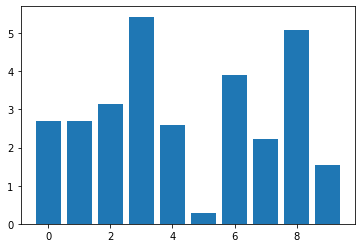

In [132]:
visual_groups(lda_group(neinei, False))

In [ ]:
# Keyrir í tæpar 40 mín, stallar á 95% að því er virðist að eilífu
playground_groups = lda_group(data_playground.index, True)

In [121]:
b.lookup_lemmas_and_cats("leysa")

{('leysa', 'so'), ('leysir', 'kk')}

In [115]:
mat = np.zeros((len(ja), 10), dtype=np.float32)
for i, example in enumerate(ja):
    text = data_train.loc[example]["text_tokenized"]
    lemm_text = tokenize_and_lemmatize(text)
    vec = classify(lemm_text)
    for group, score in vec:
        mat[i, group] = score
score_sum = np.sum(mat, axis=0)
print(score_sum)
print(score_sum/sum(score_sum))
print(-np.sort(-score_sum))
print(np.argsort(-score_sum))


[1.5601214  1.4733455  0.29687375 3.7691574  1.4019423  0.92272925
 6.7925553  0.47448677 3.8038409  0.23345004]
[0.07526455 0.07107824 0.01432201 0.18183453 0.06763355 0.044515
 0.32769156 0.02289055 0.18350776 0.01126227]
[6.7925553  3.8038409  3.7691574  1.5601214  1.4733455  1.4019423
 0.92272925 0.47448677 0.29687375 0.23345004]
[6 8 3 0 1 4 5 7 2 9]


Setja þetta upp visually? <br>
Ath. að algengustu hóparnir dóminera kannski yfir flesta málaflokka <br>
Komast að hver algengustu hóparnir eru í train

In [ ]:
for j in data_test_labeled[data_test_labeled["label"] == 1]["text"]:
    classify(tokenize_and_lemmatize(j))
    print(j, "\n")

In [193]:
data_test_labeled[data_test_labeled["label"] == 0][:10]["text"]

387537    Formaður stéttarfélags danskra hermanna (d. Hæ...
250458    Fyrstu fimm lögin sem í ár keppa um að verða f...
495145    Stjórn Sambands íslenskra sveitarfélaga tekur ...
308724    “ Við sýnum því skilning að aðstæður fyrirtæki...
160300    Icelandair vinnur að því að finna lausn á málu...
112114    Loforð um landslag er yfirskrift sýningar á ve...
442428    Einstaklingar án sjúkratryggingar skulda Lands...
260177    Kómedíuleikhúsið hefur gefið út nýja vestfirsk...
435899    Rósa Björk Brynjólfsdóttir, varaformaður utanr...
410481    Búið er að loka veginum undir Hafnarfjalli veg...
Name: text, dtype: object

In [197]:
for nei in data_test_labeled[data_test_labeled["label"] == 0][:10]["text"]:
    classify(tokenize_and_lemmatize(nei))
    print(nei, "\n")

title


TypeError: string indices must be integers

In [207]:
for nei in data_test_labeled[data_test_labeled["label"] == 0]:
    print(nei)

title
author
timestamp
text
text_tokenized
label


In [211]:
data_test_labeled.loc[:, ('title', 'text', 'label')]

title text  label
387537   NaN  NaN    NaN
250458   NaN  NaN    NaN
495145   NaN  NaN    NaN
308724   NaN  NaN    NaN
160300   NaN  NaN    NaN
...      ...  ...    ...
116291   NaN  NaN    NaN
58590    NaN  NaN    NaN
288747   NaN  NaN    NaN
5956     NaN  NaN    NaN
191148   NaN  NaN    NaN

[481 rows x 3 columns]

In [202]:
for nei in data_test_labeled[data_test_labeled["label"] == 0][:10]:
    print(nei)
    texti = nei["text"]
    print(nei["title"])
    classify(tokenize_and_lemmatize(texti))
    print(texti, "\n")

title


TypeError: string indices must be integers

# TF LDF pælingar

In [163]:
from gensim import models
tfidf = models.TfidfModel(corpus)

In [164]:
tfidf

In [ ]:
corpus_tfidf = tfidf[corpus]
for doc in corpus_tfidf[:5]:
    print(doc)
    print()

In [170]:
# Langt, vista
lsi_model = models.LsiModel(corpus_tfidf[:55000], id2word=id2word, num_topics=10)  # initialize an LSI transformation
corpus_lsi = lsi_model[corpus_tfidf]  # create a double wrapper over the original corpus: bow->tfidf->fold-in-lsi


In [175]:
lsi_model.print_topics(10)

2021-11-18 12:38:45,824 : INFO : topic #0(22.662): 0.206*"lögregla" + 0.186*"leikmaður" + 0.169*"félag" + 0.154*"maður" + 0.150*"dagur" + 0.147*"ísland" + 0.140*"mínúta" + 0.134*"fólk" + 0.130*"kvöld" + 0.125*"sigur"
2021-11-18 12:38:45,833 : INFO : topic #1(18.420): 0.282*"lögregla" + -0.273*"hálfleikur" + -0.264*"mínúta" + -0.261*"leikmaður" + -0.230*"sigur" + -0.217*"deild" + -0.174*"úrvalsdeild" + -0.164*"mark" + -0.153*"leikur" + -0.133*"kvöld"
2021-11-18 12:38:45,841 : INFO : topic #2(15.882): -0.588*"lögregla" + 0.215*"félag" + -0.163*"ökumaður" + -0.144*"maður" + 0.144*"prósent" + 0.130*"flokkur" + 0.129*"milljarður" + -0.127*"bíll" + 0.123*"milljón" + -0.118*"mínúta"
2021-11-18 12:38:45,852 : INFO : topic #3(14.194): -0.476*"félag" + -0.411*"leikmaður" + 0.225*"hálfleikur" + 0.222*"mínúta" + -0.179*"milljón" + 0.176*"flokkur" + -0.160*"lögregla" + -0.155*"tímabil" + 0.148*"sigur" + 0.145*"forseti"
2021-11-18 12:38:45,869 : INFO : topic #4(12.646): -0.246*"prósent" + -0.218*"lö

[(0,
  '0.206*"lögregla" + 0.186*"leikmaður" + 0.169*"félag" + 0.154*"maður" + 0.150*"dagur" + 0.147*"ísland" + 0.140*"mínúta" + 0.134*"fólk" + 0.130*"kvöld" + 0.125*"sigur"'),
 (1,
  '0.282*"lögregla" + -0.273*"hálfleikur" + -0.264*"mínúta" + -0.261*"leikmaður" + -0.230*"sigur" + -0.217*"deild" + -0.174*"úrvalsdeild" + -0.164*"mark" + -0.153*"leikur" + -0.133*"kvöld"'),
 (2,
  '-0.588*"lögregla" + 0.215*"félag" + -0.163*"ökumaður" + -0.144*"maður" + 0.144*"prósent" + 0.130*"flokkur" + 0.129*"milljarður" + -0.127*"bíll" + 0.123*"milljón" + -0.118*"mínúta"'),
 (3,
  '-0.476*"félag" + -0.411*"leikmaður" + 0.225*"hálfleikur" + 0.222*"mínúta" + -0.179*"milljón" + 0.176*"flokkur" + -0.160*"lögregla" + -0.155*"tímabil" + 0.148*"sigur" + 0.145*"forseti"'),
 (4,
  '-0.246*"prósent" + -0.218*"lögregla" + -0.209*"félag" + 0.208*"leikmaður" + -0.205*"milljarður" + -0.190*"flokkur" + 0.179*"barn" + -0.167*"mínúta" + -0.160*"hálfleikur" + 0.157*"mynd"'),
 (5,
  '-0.366*"leikmaður" + -0.299*"flokkur

In [174]:
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)



In [173]:
for doc, as_text in zip(corpus_lsi, data_train["text"][:55000]):
    print(doc, as_text)


[(0, 0.10235972344891278), (1, 0.020344954703777677), (2, 0.06622273279678563), (3, -0.052855897522198526), (4, -0.03602474257661673), (5, 0.0753786627155493), (6, -0.0010892907595715414), (7, -0.0028461407747198265), (8, 0.0030945536884134065), (9, 0.015204924190956566)] Áheit um hundrað milljónir króna hafa safnast á fyrsta sólarhring undirskriftarsöfnunar hugmyndar um nýtt íslenskt flugfélag. Þá hafa 277 manns skráð sig fyrir forgangskaupum á flugmílum á heildsöluverði. Þetta fullyrðir Ástþór Magnússon, einn aðstandenda söfnunarinnar, sem er bjartsýnn á að áform um stofnun flugfélagsins gangi eftir. Um er að ræða hugmynd að flugfélagi þar sem stefnan er sett á umhverfisvænar flugsamgöngur. Áheit hafa verið skráð á vefsíðunni Fly Icelandic. Ástþór hefur áform um plastlausar flugferðir þar sem fólki á að gefast kostur á að breyta farmiðum allt fram að síðustu mínútum fyrir brottför. Hann segist vera með reynslumikla menn með sér í liði, þar á meðal fyrrum fjármálastjóra flugvélaframle

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



[(0, 0.09948064475739198), (1, 0.044955658842056316), (2, 0.10769471260765939), (3, 0.09895182341784255), (4, -0.08530629669935164), (5, -0.17018303620066305), (6, -0.022285046369609516), (7, -0.013147646091786), (8, 0.0018787369868955416), (9, 0.028216991499611706)] Boris Johnson, forsætisráðherra Bretlands, vill boða til kosninga í október ef breska þingið útilokar úrgöngu Breta úr Evrópusambandinu án samnings. Þetta fullyrða breskir fjölmiðlar í kvöld og hafa eftir heimildarmönnum. Þar segir jafnframt að þingmönnum Íhaldsflokksins sem greiða atkvæði gegn stefnu stjórnarinnar hafi verið hótað að þeir fái ekki að bjóða fram fyrir flokkinn í þingkosningum. Johnson hélt ræðu síðdegis þar sem hann skoraði á þingmenn Íhaldsflokksins að grafa ekki undan samningamönnum Bretlands sem freista þess nú að ná nýjum samningi við Evrópusambandið um úrgöngu Bretlands. Johnson sagðist þá ekki vilja kosningar, og að það vildu landsmenn heldur ekki. Kosningar 14. október? Stuttu eftir að Johnson lauk 

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



[(0, 0.02269637078128456), (1, -0.0018894516216406373), (2, -0.00689100853248267), (3, -0.001029559116710912), (4, 0.01721289610670104), (5, -0.0036077215334223895), (6, -0.008040594146717624), (7, 0.005749619334313406), (8, -0.007693331199572588), (9, -0.02032757751001916)] Tvöfaldi Masters-sigurvegarinn Bubba Watson hrósaði sigri á Genesis Open golfmótinu sem lauk í gærkvöldi. Watson var tveim höggum á undan næstu mönnum. Watson spilaði lokadaginn á 69 höggum eða tveim höggum undir pari. Kevin Na og Tony Finau sóttu að honum en urðu að sætta sig við annað og þriðja sætið að lokum. Hinn 39 ára gamli Watson var með fimm fugla og þrjá skolla á lokahringnum. Hann gerði meira en nóg til þess að klára þetta skemmtilega mót. Rory McIlroy hafnaði 20. sæti mótsins ásamt fleirum og besti kylfingur heims, Dustin Johnson, var í 16. sæti ásamt fleirum.
[(0, 0.2575482788842017), (1, -0.17687919326717474), (2, 0.16747060608409442), (3, -0.4829716943773143), (4, 0.019470937985426148), (5, -0.1456009

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



 „Guð, nei! Það get ég ekki,“ segir Þóra María Stefánsdóttir, sem í dag fagnar hálfrar aldar starfsafmæli á leikskólanum Laugasól í Laugarneshverfi í Reykjavík, er hún er spurð hvort hún geti skotið á fjölda barna sem hún hefur kennt á leikskólanum síðustu fimmtíu árin. Þóra María er 68 ára gömul og hefur starfað á leikskólanum frá 2. október árið 1967. Þá hafði hún hætt í námi og vantaði atvinnu. „Ég fór þarna með móður minni til leikskólastjórans, sem var þá Guðrún Gunnarsdóttir, og hún réði mig bara. Þá var ég sautján ára gömul,“ segir Þóra María í samtali við mbl. is. Hún segir að henni hafi alla tíð liðið vel í starfi á leikskólanum. „Annars hefði ég ekki verið svona lengi þarna. En auðvitað eru alltaf breytingar á starfsfólki og svona og það getur verið erfitt. En mér hefur alltaf liðið vel. Þetta er stundum erfitt, bæði líkamlega og andlega, en dagarnir eru fljótir að líða.“ Alla tíð unnið með góðu fólki Þóra segir að hún hafi unnið með góðu fólki á leikskólanum. „Þegar ég átti 

KeyboardInterrupt: 